# Exploring different Legend options in Magics

**Mlegend** controls how legend looks on our maps. Here we can set things like display type, position, width, height, title and many more things.  
List of all **mlegend** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Legend "Legend parameters")


### Import Magics and define non Lengend paramters

For start let's import Magics and define some **none legend** parameters. We will try not to change these much in the rest of the notebook.

In [1]:
import Magics.macro as magics
import xarray as xr

projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = "europe",
    page_id_line = 'off'
)

coast = magics.mcoast()

ecmwf_cont = magics.mcont(
    contour_automatic_setting = "ecmwf",
    legend = "on")

# Different meteorological parameters we will plot in this notebook
temperature   = magics.mgrib(grib_input_file_name = "data/t850.grib")
geopotential  = magics.mgrib(grib_input_file_name = "data/z500.grib")
precipitation = magics.mgrib(grib_input_file_name = "data/total_precipitation.grib")
sat_ir        = magics.mgrib(grib_input_file_name = "data/ssd.grib")

/usr/local/apps/python3/3.6.8-01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### Default legend

As with everything in Magics, default is something you can start with.

Default display type is disjoint. Default text colour is blue, and position is horizontal on top.

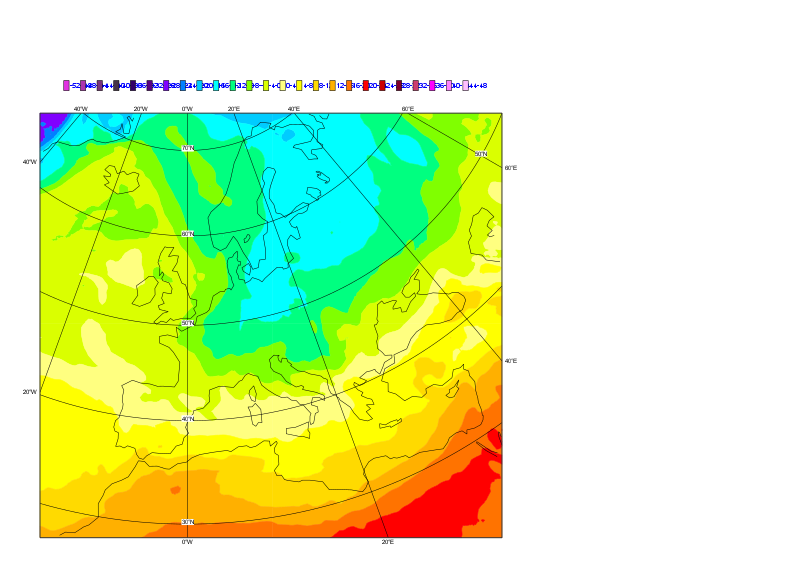

In [2]:
legend = magics.mlegend()

magics.plot(projection, temperature, ecmwf_cont, coast, legend)

### Example 1: Vertical legend with user defined title

Legend default position is at the top, but another automatic position is on the right side.   
Display type can be disjoint, histogram and continuous.   

If we have many values shaded, we can choose to plot only some of them by setting **legend_label_frequency**.

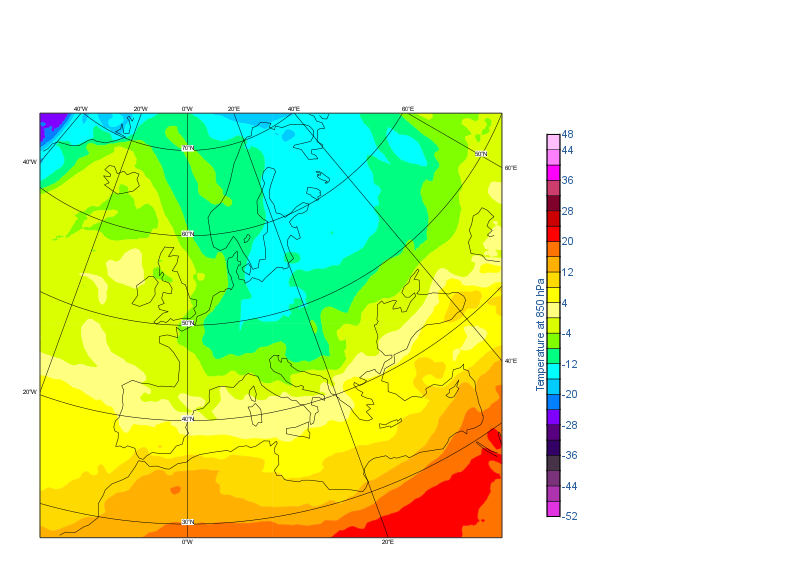

In [4]:
legend = magics.mlegend(
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "Temperature at 850 hPa",
    legend_text_font_size     = 0.45,
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 2) 
    
magics.plot(projection, temperature, ecmwf_cont, coast, legend)    

### Example 2

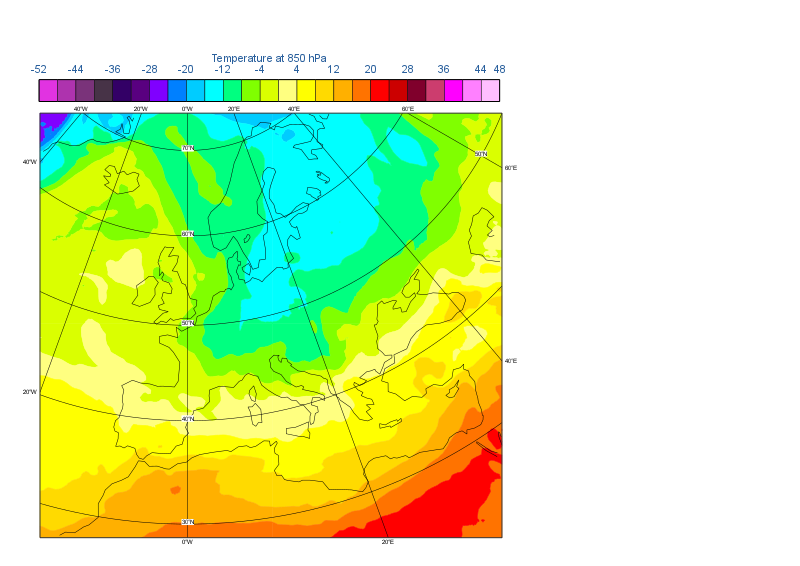

In [5]:
legend = magics.mlegend(
    legend_display_type       = "continuous",
    legend_box_mode           = "positional",
    legend_box_x_position     = 0.5,
    legend_box_y_position     = 17.00,
    legend_box_x_length       = 19.00,
    legend_box_y_length       = 2.0,
    #legend_entry_border       = "off",
    legend_title              = "on",
    legend_title_text         = "Temperature at 850 hPa",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 2) 
    
magics.plot(projection, temperature, ecmwf_cont, coast, legend)

### User defined minimum and maximum

If we don't want to show the actual minimum and maximum of the field, or list of levels, we can write something special only on first and last point at legend using **mlegend**'s maximum and minimum parameters.

Also, for cases when we have many many levels we can remove the lines between colours on legend.

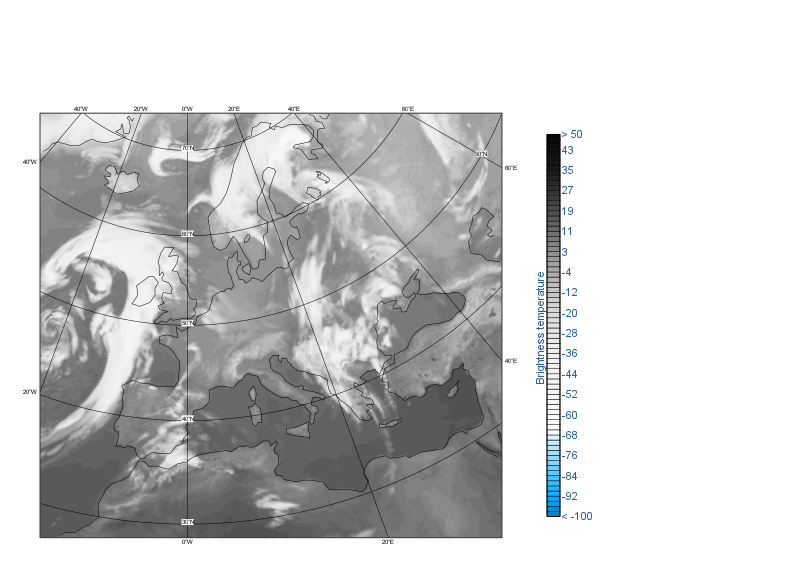

In [6]:
legend = magics.mlegend(
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    #legend_entry_text_width   = 40,
    legend_title_text         = "Brightness temperature",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 4,
    #legend_entry_border       = "off",
    legend_user_minimum       = "on",
    legend_user_minimum_text  = "< -100",
    legend_user_maximum       = "on",
    legend_user_maximum_text  = "> 50")

  
magics.plot(projection, sat_ir, ecmwf_cont, coast, legend)  

### Example 3: Positional disjoint legend with user defined labels

Lables on the legend can be numbers as well as user defined text (and both).
If we have too much text we might want to separate legend in columns, instead putting all in one row.

Let's make highly customized positional, disjoint legend, with title and text labels.

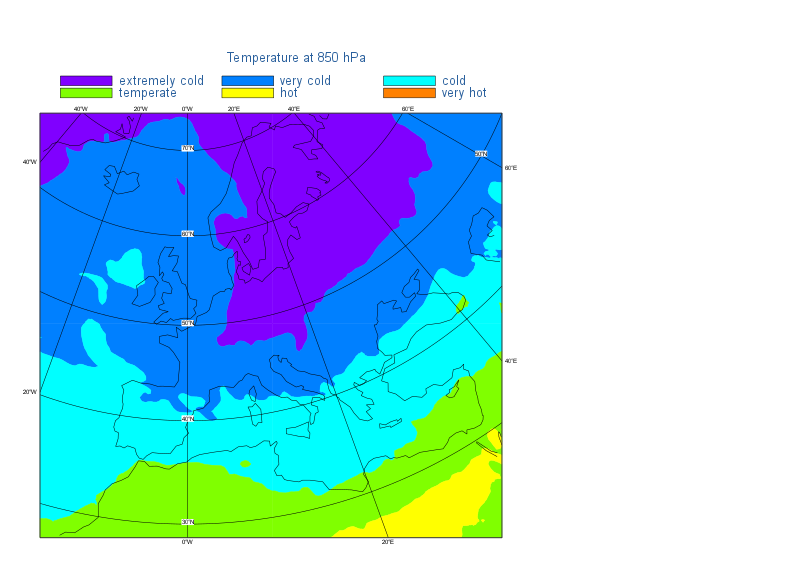

In [7]:
t850_contour = magics.mcont(
    legend                       = "on",
    contour_shade                = "on",
    contour_hilo                 = "off",
    contour                      = "off",
    contour_label                = "off",
    contour_shade_method         = "area_fill",     
    contour_shade_max_level      = 48.,
    contour_shade_min_level      = -48.,     
    contour_level_selection_type = "level_list",
    contour_level_list           = [-48.0,-10.0,0.0,10.0,20.0,30.0, 48.0],
    contour_shade_colour_method  = "list",
    contour_shade_colour_list    = [ "blue_purple",
                                     "greenish_blue",
                                     "blue_green",
                                     "yellow_green",
                                     "yellow",
                                     "orange"])

legend = magics.mlegend(
    legend_box_mode         = "positional",
    legend_box_x_position   = 1.00,
    legend_box_y_position   = 17.00,
    legend_box_x_length     = 20.00,
    legend_box_y_length     = 2.00,
    legend_column_count     = 3,    
    legend_display_type     = "disjoint",
    legend_text_composition = "user_text_only",
    legend_title            = "on",
    legend_user_lines       = ["extremely cold",
                               "very cold",
                               "cold",
                               "temperate",
                               "hot",
                               "very hot"],
    legend_text_font_size   = "0.55",
    legend_text_colour      = "#2b619e",
    legend_title_text       = "Temperature at 850 hPa")
    
magics.plot(projection, temperature, t850_contour, coast, legend)

### Gradients' waypoints labels on Legend

In cases we are using gradients as shading colour method, and have a large number of colours, we may want to label only gradients' waypoints. The way to do it is by supplying list of values for labels. 

A little tip for the case we don't want any lines on legend. Setting **legend_entry_border** to "off" will remove lines between the colours, but the line around the legend is still there as we can see in previous example. The trick to get rid of that line too is to set **legend_entry_border** to "on" and **legend_entry_border_colour** to "none".


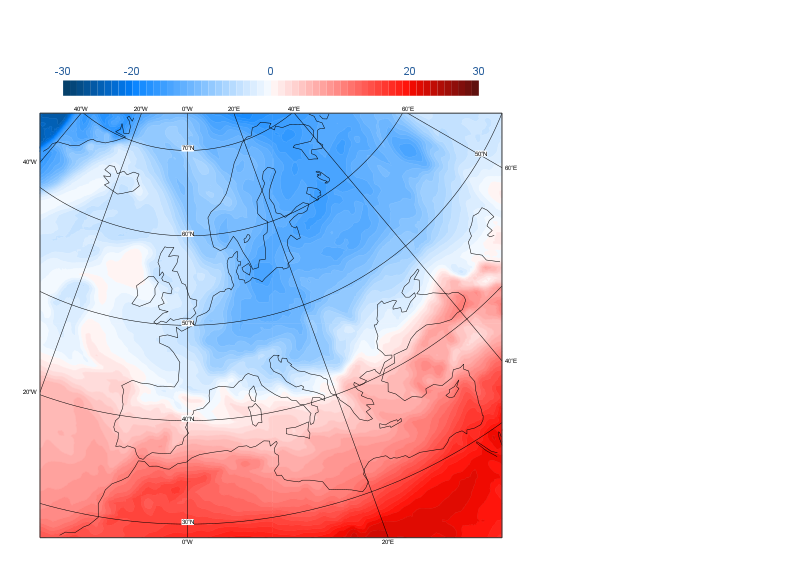

In [8]:
t_cont = magics.mcont(
    legend                            = "on",
    contour                           = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [-30.,-20.,0.,20.,30.],
    contour_gradients_step_list       = [10,20,20,10],
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_colour_method       = "gradients",
    contour_gradients_technique       = "rgb",
    contour_shade_method              = "area_fill",
    contour_gradients_colour_list     = ["RGB(0.01961,0.251,0.4157)","greenish_blue","white",
                                         "orangish_red","RGB(0.3756,0.06648,0.05582)"],
    contour_gradients_waypoint_method = "ignore")

legend = magics.mlegend(
    legend_display_type        = "continuous",
    legend_box_mode            = "automatic",
    legend_text_composition    = "user_text_only",
    legend_values_list         = [-30.,-20.,0.,20.,30.],
    legend_text_font_size      = "0.45",
    legend_text_colour         = "#2b619e",    
    legend_entry_border        = "on",
    legend_entry_border_colour = "none")  
    
magics.plot(projection, temperature, t_cont, coast, legend) 

### Positional and histogram legend

Legend can be in a form of histogram too.

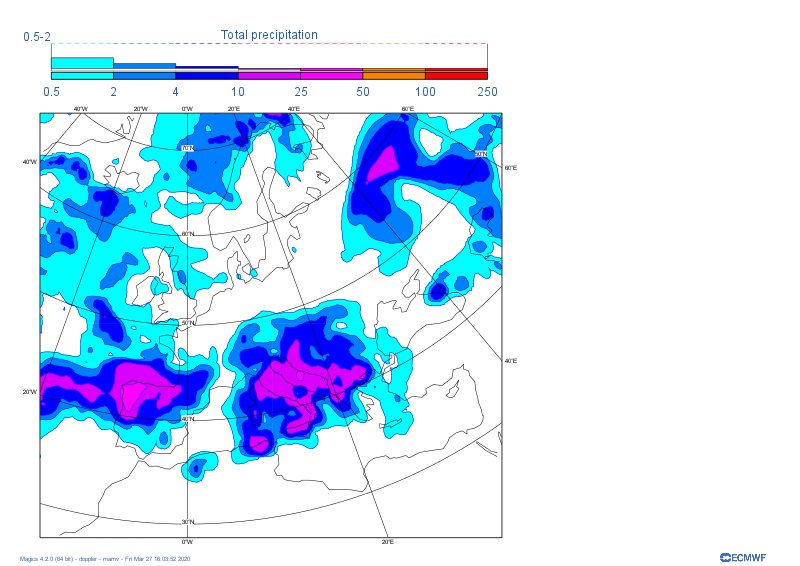

In [36]:
legend = magics.mlegend(
    legend_display_type   = "histogram",
    legend_box_mode       = "positional",
    legend_box_x_position = 1.00,
    legend_box_y_position = 17.00,
    legend_box_x_length   = 18.00,
    legend_box_y_length   = 3.00,
    legend_title          = "on",
    legend_title_text     = "Total precipitation",
    legend_text_font_size = "0.5",
    legend_text_colour    = "#2b619e")
    
magics.plot(projection, precipitation, ecmwf_cont, coast, legend)